In [7]:
import cv2
import potrace
import numpy as np
import argparse
from matplotlib import pyplot as plt
from l0smooth.L0_serial import l0_smooth
from IPython.display import Image, display

In [8]:
%matplotlib inline
IMAGE_PATH = "./images/img2.png"
image_l0 = l0_smooth(IMAGE_PATH)

image_gray = cv2.cvtColor(image_l0, cv2.COLOR_BGR2GRAY)

image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)

high_thresh_blur, thresh_im = cv2.threshold(image_blur.astype('uint8'), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

low_thresh_blur = 0.5 * high_thresh_blur

image_can = cv2.Canny(image_blur.astype('uint8'), low_thresh_blur, high_thresh_blur, True, apertureSize=5)

Processing 226 x 270 RGB image


[[  0   0 255 ...   0   0   0]
 [  0   0 255 ... 255 255 255]
 [  0   0 255 ...   0   0   0]
 ...
 [255   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


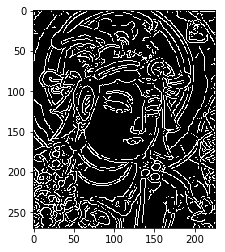

In [15]:
plt.imshow(image_can, cmap='Greys_r')
print(image_can)

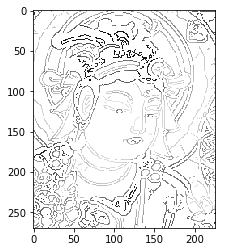

In [17]:
image_outer = np.zeros(image_blur.shape)

for i in range(0, len(image_outer)):
    for j in range(0, len(image_outer[i])):
        if(image_can[i][j] == 255):
            image_outer[i][j] = image_blur[i][j]
        else:
            image_outer[i][j] = 255

plt.imshow(image_outer, cmap='Greys_r')

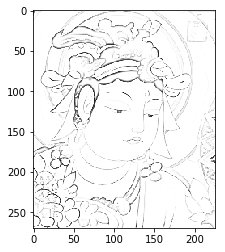

In [19]:
image_inner = np.zeros(image_blur.shape)

for i in range(0, len(image_inner)):
    for j in range(0, len(image_inner[i])):
        if(image_blur[i][j] == 0):
            delta = 255.0
        else:
            delta = ((255.0 - image_blur[i][j]) / float(image_blur[i][j])) * image_gray[i][j]

        image_inner[i][j] = min(255.0, (image_gray[i][j] + delta))

plt.imshow(image_inner, cmap='Greys_r')

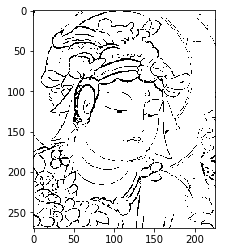

In [32]:
high_thresh_inner, thresh_im_inner = cv2.threshold(image_inner.astype('uint8'), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

image_inner_thresh = np.zeros(image_blur.shape)

for i in range(0, len(image_inner_thresh)):
    for j in range(0, len(image_inner_thresh[i])):
        if(image_inner[i][j] >= high_thresh_inner):
            image_inner_thresh[i][j] = 255
        else:
            image_inner_thresh[i][j] = 0

plt.imshow(image_inner_thresh, cmap='Greys_r')

bmp = potrace.Bitmap(image_inner_thresh/255.)
path = bmp.trace()
for curve in path:
    print "start_point =", curve.start_point
    for segment in curve:
        print segment
        end_point_x, end_point_y = segment.end_point
        if segment.is_corner:
            c_x, c_y = segment.c
        else:
            c1_x, c1_y = segment.c1
            c2_x, c2_y = segment.c2